In [80]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import reboundx
from reboundx import constants
from subprocess import call
from rebound.plotting import fading_line
%matplotlib inline

(-2.0, 2.0, -2.0, 2.0)

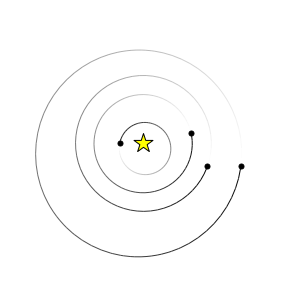

In [75]:
sim = rebound.Simulation('mercuryunstable.bin')
fig, ax = rebound.OrbitPlot(sim, xlim=[-2, 2], ylim=[-2, 2])
ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
ax.axis('off')

(-0.5002381571238518,
 0.49978628822030846,
 -0.5000946521907589,
 0.500121170961901)

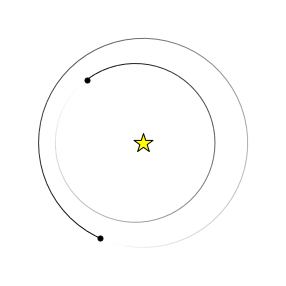

In [74]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(P=1, e=0.1, f=2.3)
sim.add(P=1.5, e=0, f=-2)
fig, ax = rebound.OrbitPlot(sim)
ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
ax.axis('off')

In [39]:
t = 3.2
sa = rebound.SimulationArchive('unstable.bin')
sim = sa[-1]
sim.integrator_synchronize()
rebx = reboundx.Extras(sim)
gr = rebx.load_force('gr_potential')
rebx.add_force(gr)
gr.params['c'] = constants.C
sim.integrate(sim.t+1e5*2*np.pi)

Encounter: Two particles had a close encounter (d<exit_min_distance).

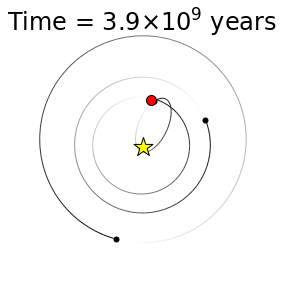

In [51]:
sim.integrator_synchronize()
fig, ax = rebound.OrbitPlot(sim, xlim=[-2, 2], ylim=[-2, 2])
ax.text(-2, 1.7, r'Time = 3.9$\times 10^9$ years'.format(int(t/2/np.pi)), fontsize=24)
ax.axis('off')
ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
ax.scatter(sim.particles[1].x-0.05, sim.particles[1].y+0.02, marker='o', s=100, facecolor='red', edgecolor='black', zorder=3)

In [13]:
sim.save('mercuryunstable.bin')

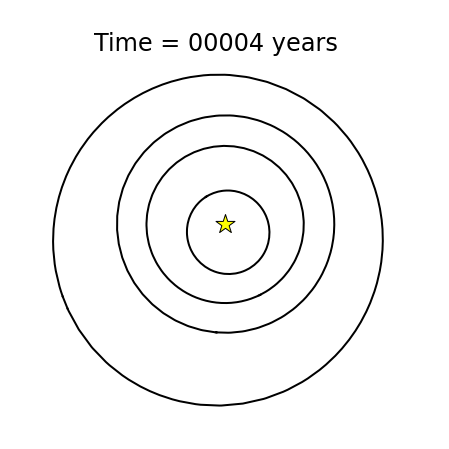

In [96]:
i, time, filename, dpi = 0, 30, 'mercuryunstable.bin', 300
sim = rebound.Simulation(filename)
sim.t = 0
sim.integrate(time, exact_finish_time=0)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

for p in sim.particles[1:]:
    o = np.array(p.sample_orbit())
    ax.plot(o[:,0], o[:,1], 'k', lw=2)
    ax.plot([o[:,0][-1], o[:,0][0]], [o[:,1][-1], o[:,1][0]], 'k', lw=2)
ax.text(-1.2, 1.6, 'Time = {0:0=5d} years'.format(int(time/2/np.pi)), fontsize=24)
ax.axis('off')
ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
ax.set_aspect('equal')

In [99]:
def write_png(params):
    i, time, filename, dpi = params
    sim = rebound.Simulation(filename)
    sim.t = 0
    sim.integrate(time, exact_finish_time=0)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

    for p in sim.particles[1:]:
        o = np.array(p.sample_orbit())
        ax.plot(o[:,0], o[:,1], 'k', lw=2)
        ax.plot([o[:,0][-1], o[:,0][0]], [o[:,1][-1], o[:,1][0]], 'k', lw=2)
    ax.text(-1.2, 1.7, 'Time = {0:0=5d} years'.format(int(time/2/np.pi)), fontsize=24)
    ax.axis('off')
    ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
    ax.set_aspect('equal')
    fig.savefig('tmp/{0:0=5d}.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')
    plt.close(fig)  

In [100]:
%%time
dpi = 300.1
Lmovie = 20
fps = 30
t = 200000
times = np.linspace(0, t*2*np.pi, int(Lmovie*fps))

call("rm -f tmp/*.png", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, 'mercuryunstable.bin', dpi) for i, time in enumerate(times)]
res = pool.map(write_png, params)

CPU times: user 9.73 s, sys: 7.5 s, total: 17.2 s
Wall time: 19min 9s


In [76]:
def write_png(params):
    i, time, filename, dpi = params
    sim = rebound.Simulation(filename)
    sim.t = 0
    sim.integrate(time, exact_finish_time=0)
    fig, ax = rebound.OrbitPlot(sim, xlim=[-2, 2], ylim=[-2, 2])
    ax.text(-1.3, 1.5, 'Time = {0} years'.format(int(t/2/np.pi)), fontsize=24)
    ax.axis('off')
    ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
    fig.savefig('tmp/{0:0=5d}.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')
    plt.close(fig)  

In [78]:
%%time
dpi = 300.1
Lmovie = 60
fps = 30
t = 20
times = np.linspace(0, t*2*np.pi, int(Lmovie*fps))

call("rm -f tmp/*.png", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, 'mercuryunstable.bin', dpi) for i, time in enumerate(times)]
res = pool.map(write_png, params)

CPU times: user 813 ms, sys: 602 ms, total: 1.42 s
Wall time: 1min 31s
